In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

%matplotlib inline

tfe.enable_eager_execution(device_policy = tfe.DEVICE_PLACEMENT_SILENT)

In [2]:
from gan import GAN

In [3]:
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'

In [4]:
noise_dim = 100
output_dim = 28 * 28

In [5]:
gan = GAN(noise_dim=noise_dim, output_dim=output_dim, device_name=device, learning_rate=1e-4)

In [6]:
# if you already have pretrained model
# gan.load(global_step="latest")

In [6]:
from tensorflow.python.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_val = X_test.astype('float32') / 255.
X_val = X_val.reshape((X_val.shape[0], 28 * 28))

In [7]:
Z = tf.random_normal((1, noise_dim))
gan(Z, True)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Generator)        multiple                  247440    
_________________________________________________________________
discriminator (Discriminator multiple                  238017    
Total params: 485,457
Trainable params: 485,457
Non-trainable params: 0
_________________________________________________________________


In [8]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12928     
_________________________________________________________________
dense_2 (Dense)              multiple                  33024     
_________________________________________________________________
dense_3 (Dense)              multiple                  201488    
Total params: 247,440
Trainable params: 247,440
Non-trainable params: 0
_________________________________________________________________


In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  200960    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  32896     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  4128      
_________________________________________________________________
dense_7 (Dense)              multiple                  33        
Total params: 238,017
Trainable params: 238,017
Non-trainable params: 0
_________________________________________________________________


In [8]:
def randomtest():
    Z = tf.random_normal((10, noise_dim))
    img_test = gan.generator(Z)
    img_test = img_test.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
    
    plt.imshow(img_test)
    plt.show()

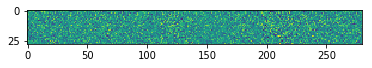

In [9]:
randomtest()

[EPOCH 1 / STEP 1] TRAIN 
TRAIN loss   : 2.8410
GEN   loss   : 2.6888
DIS   loss   : 0.1522
[EPOCH 1 / STEP 1] VAL 
TRAIN loss   : 4.4191
GEN   loss   : 4.3834
DIS   loss   : 0.0357
[EPOCH 2 / STEP 2] TRAIN 
TRAIN loss   : 6.7899
GEN   loss   : 6.7651
DIS   loss   : 0.0249
[EPOCH 2 / STEP 2] VAL 
TRAIN loss   : 7.4001
GEN   loss   : 7.3883
DIS   loss   : 0.0118
[EPOCH 3 / STEP 3] TRAIN 
TRAIN loss   : 5.6595
GEN   loss   : 5.6344
DIS   loss   : 0.0251
[EPOCH 3 / STEP 3] VAL 
TRAIN loss   : 6.3126
GEN   loss   : 6.2931
DIS   loss   : 0.0196
[EPOCH 4 / STEP 4] TRAIN -- Generator only step
TRAIN loss   : 5.3800
GEN   loss   : 0.0199
DIS   loss   : 5.3601
[EPOCH 4 / STEP 4] VAL -- Generator only step
TRAIN loss   : 6.0105
GEN   loss   : 0.0009
DIS   loss   : 6.0095
[EPOCH 5 / STEP 5] TRAIN -- Generator only step
TRAIN loss   : 6.3871
GEN   loss   : 0.0005
DIS   loss   : 6.3867
[EPOCH 5 / STEP 5] VAL -- Generator only step
TRAIN loss   : 6.6989
GEN   loss   : 0.0002
DIS   loss   : 6.6986


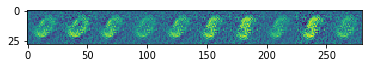

[EPOCH 1 / STEP 6] TRAIN 
TRAIN loss   : 4.6717
GEN   loss   : 4.6100
DIS   loss   : 0.0617
[EPOCH 1 / STEP 6] VAL 
TRAIN loss   : 4.6895
GEN   loss   : 4.6559
DIS   loss   : 0.0336
[EPOCH 2 / STEP 7] TRAIN 
TRAIN loss   : 4.9901
GEN   loss   : 4.9493
DIS   loss   : 0.0408
[EPOCH 2 / STEP 7] VAL 
TRAIN loss   : 4.9636
GEN   loss   : 4.9137
DIS   loss   : 0.0499
[EPOCH 3 / STEP 8] TRAIN 
TRAIN loss   : 4.8260
GEN   loss   : 4.7799
DIS   loss   : 0.0462
[EPOCH 3 / STEP 8] VAL 
TRAIN loss   : 5.9654
GEN   loss   : 5.9439
DIS   loss   : 0.0215
[EPOCH 4 / STEP 9] TRAIN -- Generator only step
TRAIN loss   : 5.5097
GEN   loss   : 0.0255
DIS   loss   : 5.4842
[EPOCH 4 / STEP 9] VAL -- Generator only step
TRAIN loss   : 6.1460
GEN   loss   : 0.0012
DIS   loss   : 6.1448
[EPOCH 5 / STEP 10] TRAIN -- Generator only step
TRAIN loss   : 6.4956
GEN   loss   : 0.0007
DIS   loss   : 6.4949
[EPOCH 5 / STEP 10] VAL -- Generator only step
TRAIN loss   : 6.7447
GEN   loss   : 0.0003
DIS   loss   : 6.7444


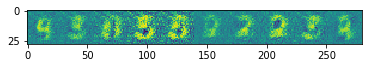

[EPOCH 1 / STEP 11] TRAIN 
TRAIN loss   : 4.2262
GEN   loss   : 4.1283
DIS   loss   : 0.0979
[EPOCH 1 / STEP 11] VAL 
TRAIN loss   : 4.3204
GEN   loss   : 4.2846
DIS   loss   : 0.0358
[EPOCH 2 / STEP 12] TRAIN 
TRAIN loss   : 4.7834
GEN   loss   : 4.7274
DIS   loss   : 0.0560
[EPOCH 2 / STEP 12] VAL 
TRAIN loss   : 4.8292
GEN   loss   : 4.7830
DIS   loss   : 0.0462
[EPOCH 3 / STEP 13] TRAIN 
TRAIN loss   : 5.0436
GEN   loss   : 4.9914
DIS   loss   : 0.0523
[EPOCH 3 / STEP 13] VAL 
TRAIN loss   : 4.2639
GEN   loss   : 4.2073
DIS   loss   : 0.0566
[EPOCH 4 / STEP 14] TRAIN -- Generator only step
TRAIN loss   : 5.2162
GEN   loss   : 0.0168
DIS   loss   : 5.1994
[EPOCH 4 / STEP 14] VAL -- Generator only step
TRAIN loss   : 6.0562
GEN   loss   : 0.0004
DIS   loss   : 6.0559
[EPOCH 5 / STEP 15] TRAIN -- Generator only step
TRAIN loss   : 6.5767
GEN   loss   : 0.0002
DIS   loss   : 6.5766
[EPOCH 5 / STEP 15] VAL -- Generator only step
TRAIN loss   : 7.0236
GEN   loss   : 0.0001
DIS   loss   :

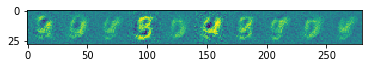

[EPOCH 1 / STEP 16] TRAIN 
TRAIN loss   : 4.2798
GEN   loss   : 4.1752
DIS   loss   : 0.1046
[EPOCH 1 / STEP 16] VAL 
TRAIN loss   : 4.2890
GEN   loss   : 4.2102
DIS   loss   : 0.0788
[EPOCH 2 / STEP 17] TRAIN 
TRAIN loss   : 4.5778
GEN   loss   : 4.5040
DIS   loss   : 0.0737
[EPOCH 2 / STEP 17] VAL 
TRAIN loss   : 3.5109
GEN   loss   : 3.4076
DIS   loss   : 0.1033
[EPOCH 3 / STEP 18] TRAIN 
TRAIN loss   : 4.6703
GEN   loss   : 4.5983
DIS   loss   : 0.0720
[EPOCH 3 / STEP 18] VAL 
TRAIN loss   : 4.7181
GEN   loss   : 4.6377
DIS   loss   : 0.0804
[EPOCH 4 / STEP 19] TRAIN -- Generator only step
TRAIN loss   : 4.8641
GEN   loss   : 0.0204
DIS   loss   : 4.8437
[EPOCH 4 / STEP 19] VAL -- Generator only step
TRAIN loss   : 5.5650
GEN   loss   : 0.0009
DIS   loss   : 5.5641
[EPOCH 5 / STEP 20] TRAIN -- Generator only step
TRAIN loss   : 5.9060
GEN   loss   : 0.0005
DIS   loss   : 5.9055
[EPOCH 5 / STEP 20] VAL -- Generator only step
TRAIN loss   : 6.2174
GEN   loss   : 0.0002
DIS   loss   :

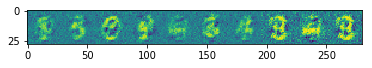

[EPOCH 1 / STEP 21] TRAIN 
TRAIN loss   : 3.8519
GEN   loss   : 3.7144
DIS   loss   : 0.1376
[EPOCH 1 / STEP 21] VAL 
TRAIN loss   : 3.9746
GEN   loss   : 3.8623
DIS   loss   : 0.1123
[EPOCH 2 / STEP 22] TRAIN 
TRAIN loss   : 4.2960
GEN   loss   : 4.2021
DIS   loss   : 0.0940
[EPOCH 2 / STEP 22] VAL 
TRAIN loss   : 3.8875
GEN   loss   : 3.7874
DIS   loss   : 0.1002
[EPOCH 3 / STEP 23] TRAIN 
TRAIN loss   : 4.3708
GEN   loss   : 4.2785
DIS   loss   : 0.0923
[EPOCH 3 / STEP 23] VAL 
TRAIN loss   : 4.5306
GEN   loss   : 4.4310
DIS   loss   : 0.0996
[EPOCH 4 / STEP 24] TRAIN -- Generator only step
TRAIN loss   : 5.3791
GEN   loss   : 0.0249
DIS   loss   : 5.3543
[EPOCH 4 / STEP 24] VAL -- Generator only step
TRAIN loss   : 6.1319
GEN   loss   : 0.0007
DIS   loss   : 6.1312
[EPOCH 5 / STEP 25] TRAIN -- Generator only step
TRAIN loss   : 6.5334
GEN   loss   : 0.0004
DIS   loss   : 6.5330
[EPOCH 5 / STEP 25] VAL -- Generator only step
TRAIN loss   : 6.8703
GEN   loss   : 0.0002
DIS   loss   :

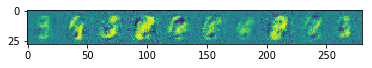

[EPOCH 1 / STEP 26] TRAIN 
TRAIN loss   : 3.5786
GEN   loss   : 3.4100
DIS   loss   : 0.1686
[EPOCH 1 / STEP 26] VAL 
TRAIN loss   : 3.6996
GEN   loss   : 3.5694
DIS   loss   : 0.1302
[EPOCH 2 / STEP 27] TRAIN 
TRAIN loss   : 3.9841
GEN   loss   : 3.8637
DIS   loss   : 0.1204
[EPOCH 2 / STEP 27] VAL 
TRAIN loss   : 3.9311
GEN   loss   : 3.8214
DIS   loss   : 0.1097
[EPOCH 3 / STEP 28] TRAIN 
TRAIN loss   : 3.9759
GEN   loss   : 3.8612
DIS   loss   : 0.1147
[EPOCH 3 / STEP 28] VAL 
TRAIN loss   : 4.0965
GEN   loss   : 3.9763
DIS   loss   : 0.1202
[EPOCH 4 / STEP 29] TRAIN -- Generator only step
TRAIN loss   : 4.8097
GEN   loss   : 0.0404
DIS   loss   : 4.7693
[EPOCH 4 / STEP 29] VAL -- Generator only step
TRAIN loss   : 5.7602
GEN   loss   : 0.0009
DIS   loss   : 5.7594
[EPOCH 5 / STEP 30] TRAIN -- Generator only step
TRAIN loss   : 6.1890
GEN   loss   : 0.0004
DIS   loss   : 6.1886
[EPOCH 5 / STEP 30] VAL -- Generator only step
TRAIN loss   : 6.5880
GEN   loss   : 0.0002
DIS   loss   :

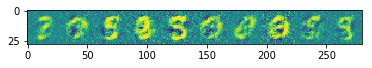

[EPOCH 1 / STEP 31] TRAIN 
TRAIN loss   : 3.4407
GEN   loss   : 3.2431
DIS   loss   : 0.1976
[EPOCH 1 / STEP 31] VAL 
TRAIN loss   : 3.5937
GEN   loss   : 3.4367
DIS   loss   : 0.1570
[EPOCH 2 / STEP 32] TRAIN 
TRAIN loss   : 3.5594
GEN   loss   : 3.4058
DIS   loss   : 0.1535
[EPOCH 2 / STEP 32] VAL 
TRAIN loss   : 3.6015
GEN   loss   : 3.4640
DIS   loss   : 0.1375
[EPOCH 3 / STEP 33] TRAIN 
TRAIN loss   : 3.6767
GEN   loss   : 3.5321
DIS   loss   : 0.1446
[EPOCH 3 / STEP 33] VAL 
TRAIN loss   : 3.4388
GEN   loss   : 3.2832
DIS   loss   : 0.1556
[EPOCH 4 / STEP 34] TRAIN -- Generator only step
TRAIN loss   : 4.6882
GEN   loss   : 0.0439
DIS   loss   : 4.6443
[EPOCH 4 / STEP 34] VAL -- Generator only step
TRAIN loss   : 5.7213
GEN   loss   : 0.0012
DIS   loss   : 5.7201
[EPOCH 5 / STEP 35] TRAIN -- Generator only step
TRAIN loss   : 6.2550
GEN   loss   : 0.0007
DIS   loss   : 6.2544
[EPOCH 5 / STEP 35] VAL -- Generator only step
TRAIN loss   : 6.7046
GEN   loss   : 0.0003
DIS   loss   :

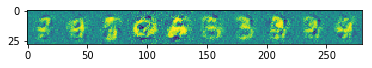

[EPOCH 1 / STEP 36] TRAIN 
TRAIN loss   : 3.0553
GEN   loss   : 2.8193
DIS   loss   : 0.2359
[EPOCH 1 / STEP 36] VAL 
TRAIN loss   : 3.3250
GEN   loss   : 3.0997
DIS   loss   : 0.2253
[EPOCH 2 / STEP 37] TRAIN 
TRAIN loss   : 3.3098
GEN   loss   : 3.1280
DIS   loss   : 0.1818
[EPOCH 2 / STEP 37] VAL 
TRAIN loss   : 3.3022
GEN   loss   : 3.1523
DIS   loss   : 0.1499
[EPOCH 3 / STEP 38] TRAIN 
TRAIN loss   : 3.4512
GEN   loss   : 3.2834
DIS   loss   : 0.1678
[EPOCH 3 / STEP 38] VAL 
TRAIN loss   : 3.8073
GEN   loss   : 3.6388
DIS   loss   : 0.1685
[EPOCH 4 / STEP 39] TRAIN -- Generator only step
TRAIN loss   : 5.0397
GEN   loss   : 0.0435
DIS   loss   : 4.9962
[EPOCH 4 / STEP 39] VAL -- Generator only step
TRAIN loss   : 6.0509
GEN   loss   : 0.0012
DIS   loss   : 6.0496
[EPOCH 5 / STEP 40] TRAIN -- Generator only step
TRAIN loss   : 6.4505
GEN   loss   : 0.0006
DIS   loss   : 6.4499
[EPOCH 5 / STEP 40] VAL -- Generator only step
TRAIN loss   : 6.8230
GEN   loss   : 0.0003
DIS   loss   :

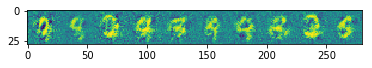

[EPOCH 1 / STEP 41] TRAIN 
TRAIN loss   : 2.8522
GEN   loss   : 2.5807
DIS   loss   : 0.2715
[EPOCH 1 / STEP 41] VAL 
TRAIN loss   : 2.9383
GEN   loss   : 2.7522
DIS   loss   : 0.1861
[EPOCH 2 / STEP 42] TRAIN 
TRAIN loss   : 3.1342
GEN   loss   : 2.9306
DIS   loss   : 0.2036
[EPOCH 2 / STEP 42] VAL 
TRAIN loss   : 3.3782
GEN   loss   : 3.2044
DIS   loss   : 0.1739
[EPOCH 3 / STEP 43] TRAIN 
TRAIN loss   : 3.3572
GEN   loss   : 3.1724
DIS   loss   : 0.1847
[EPOCH 3 / STEP 43] VAL 
TRAIN loss   : 3.3310
GEN   loss   : 3.0931
DIS   loss   : 0.2378
[EPOCH 4 / STEP 44] TRAIN -- Generator only step
TRAIN loss   : 4.8246
GEN   loss   : 0.0449
DIS   loss   : 4.7797
[EPOCH 4 / STEP 44] VAL -- Generator only step
TRAIN loss   : 5.8893
GEN   loss   : 0.0017
DIS   loss   : 5.8876
[EPOCH 5 / STEP 45] TRAIN -- Generator only step
TRAIN loss   : 6.3695
GEN   loss   : 0.0006
DIS   loss   : 6.3689
[EPOCH 5 / STEP 45] VAL -- Generator only step
TRAIN loss   : 6.7688
GEN   loss   : 0.0002
DIS   loss   :

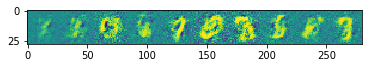

[EPOCH 1 / STEP 46] TRAIN 
TRAIN loss   : 2.9236
GEN   loss   : 2.6596
DIS   loss   : 0.2640
[EPOCH 1 / STEP 46] VAL 
TRAIN loss   : 3.0039
GEN   loss   : 2.7918
DIS   loss   : 0.2121
[EPOCH 2 / STEP 47] TRAIN 
TRAIN loss   : 3.1194
GEN   loss   : 2.9058
DIS   loss   : 0.2135
[EPOCH 2 / STEP 47] VAL 
TRAIN loss   : 3.1323
GEN   loss   : 2.9340
DIS   loss   : 0.1984
[EPOCH 3 / STEP 48] TRAIN 
TRAIN loss   : 3.2186
GEN   loss   : 3.0151
DIS   loss   : 0.2035
[EPOCH 3 / STEP 48] VAL 
TRAIN loss   : 3.0047
GEN   loss   : 2.8151
DIS   loss   : 0.1896
[EPOCH 4 / STEP 49] TRAIN -- Generator only step
TRAIN loss   : 4.9066
GEN   loss   : 0.0524
DIS   loss   : 4.8542
[EPOCH 4 / STEP 49] VAL -- Generator only step
TRAIN loss   : 6.0961
GEN   loss   : 0.0010
DIS   loss   : 6.0950
[EPOCH 5 / STEP 50] TRAIN -- Generator only step
TRAIN loss   : 6.5680
GEN   loss   : 0.0005
DIS   loss   : 6.5675
[EPOCH 5 / STEP 50] VAL -- Generator only step
TRAIN loss   : 7.0067
GEN   loss   : 0.0003
DIS   loss   :

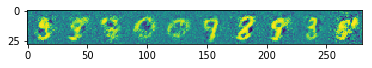

CPU times: user 11min 57s, sys: 1min 5s, total: 13min 2s
Wall time: 12min 57s


In [10]:
%%time
for i in range(10):
    gan.fit(X_train, X_val, both_step=3, gen_step=2, verbose=1, epochs=5)
    randomtest()

[EPOCH 1 / STEP 51] TRAIN 
TRAIN loss   : 2.7191
GEN   loss   : 2.4223
DIS   loss   : 0.2969
[EPOCH 1 / STEP 51] VAL 
TRAIN loss   : 2.9058
GEN   loss   : 2.6639
DIS   loss   : 0.2419
[EPOCH 5 / STEP 55] TRAIN -- Generator only step
TRAIN loss   : 7.3122
GEN   loss   : 0.0004
DIS   loss   : 7.3118
[EPOCH 5 / STEP 55] VAL -- Generator only step
TRAIN loss   : 7.7257
GEN   loss   : 0.0002
DIS   loss   : 7.7255


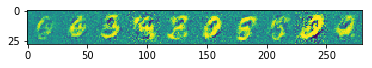

[EPOCH 1 / STEP 56] TRAIN 
TRAIN loss   : 2.6562
GEN   loss   : 2.3408
DIS   loss   : 0.3154
[EPOCH 1 / STEP 56] VAL 
TRAIN loss   : 2.8369
GEN   loss   : 2.5467
DIS   loss   : 0.2902
[EPOCH 5 / STEP 60] TRAIN -- Generator only step
TRAIN loss   : 7.2557
GEN   loss   : 0.0005
DIS   loss   : 7.2552
[EPOCH 5 / STEP 60] VAL -- Generator only step
TRAIN loss   : 7.6633
GEN   loss   : 0.0002
DIS   loss   : 7.6631


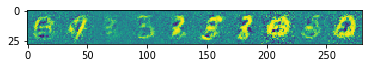

[EPOCH 1 / STEP 61] TRAIN 
TRAIN loss   : 2.5753
GEN   loss   : 2.2477
DIS   loss   : 0.3276
[EPOCH 1 / STEP 61] VAL 
TRAIN loss   : 2.4856
GEN   loss   : 2.2034
DIS   loss   : 0.2822
[EPOCH 5 / STEP 65] TRAIN -- Generator only step
TRAIN loss   : 7.1485
GEN   loss   : 0.0008
DIS   loss   : 7.1477
[EPOCH 5 / STEP 65] VAL -- Generator only step
TRAIN loss   : 7.6186
GEN   loss   : 0.0002
DIS   loss   : 7.6185


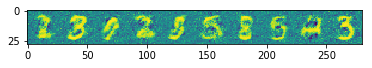

[EPOCH 1 / STEP 66] TRAIN 
TRAIN loss   : 2.6009
GEN   loss   : 2.2677
DIS   loss   : 0.3332
[EPOCH 1 / STEP 66] VAL 
TRAIN loss   : 2.7713
GEN   loss   : 2.5193
DIS   loss   : 0.2520
[EPOCH 5 / STEP 70] TRAIN -- Generator only step
TRAIN loss   : 7.0339
GEN   loss   : 0.0005
DIS   loss   : 7.0333
[EPOCH 5 / STEP 70] VAL -- Generator only step
TRAIN loss   : 7.4888
GEN   loss   : 0.0001
DIS   loss   : 7.4887


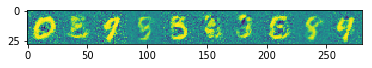

[EPOCH 1 / STEP 71] TRAIN 
TRAIN loss   : 2.6347
GEN   loss   : 2.3049
DIS   loss   : 0.3298
[EPOCH 1 / STEP 71] VAL 
TRAIN loss   : 2.5801
GEN   loss   : 2.2842
DIS   loss   : 0.2959
[EPOCH 5 / STEP 75] TRAIN -- Generator only step
TRAIN loss   : 6.8034
GEN   loss   : 0.0004
DIS   loss   : 6.8030
[EPOCH 5 / STEP 75] VAL -- Generator only step
TRAIN loss   : 7.2537
GEN   loss   : 0.0003
DIS   loss   : 7.2534


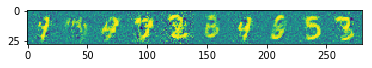

[EPOCH 1 / STEP 76] TRAIN 
TRAIN loss   : 2.5618
GEN   loss   : 2.2215
DIS   loss   : 0.3403
[EPOCH 1 / STEP 76] VAL 
TRAIN loss   : 2.4072
GEN   loss   : 2.1208
DIS   loss   : 0.2864
[EPOCH 5 / STEP 80] TRAIN -- Generator only step
TRAIN loss   : 6.5849
GEN   loss   : 0.0006
DIS   loss   : 6.5843
[EPOCH 5 / STEP 80] VAL -- Generator only step
TRAIN loss   : 6.9932
GEN   loss   : 0.0003
DIS   loss   : 6.9929


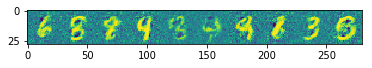

[EPOCH 1 / STEP 81] TRAIN 
TRAIN loss   : 2.6093
GEN   loss   : 2.2683
DIS   loss   : 0.3410
[EPOCH 1 / STEP 81] VAL 
TRAIN loss   : 2.6967
GEN   loss   : 2.4145
DIS   loss   : 0.2822
[EPOCH 5 / STEP 85] TRAIN -- Generator only step
TRAIN loss   : 6.9709
GEN   loss   : 0.0005
DIS   loss   : 6.9704
[EPOCH 5 / STEP 85] VAL -- Generator only step
TRAIN loss   : 7.4457
GEN   loss   : 0.0003
DIS   loss   : 7.4455


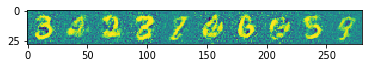

[EPOCH 1 / STEP 86] TRAIN 
TRAIN loss   : 2.5987
GEN   loss   : 2.2565
DIS   loss   : 0.3422
[EPOCH 1 / STEP 86] VAL 
TRAIN loss   : 2.5953
GEN   loss   : 2.3179
DIS   loss   : 0.2774
[EPOCH 5 / STEP 90] TRAIN -- Generator only step
TRAIN loss   : 6.5380
GEN   loss   : 0.0007
DIS   loss   : 6.5373
[EPOCH 5 / STEP 90] VAL -- Generator only step
TRAIN loss   : 7.0322
GEN   loss   : 0.0003
DIS   loss   : 7.0319


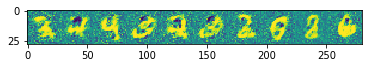

[EPOCH 1 / STEP 91] TRAIN 
TRAIN loss   : 2.5772
GEN   loss   : 2.2300
DIS   loss   : 0.3472
[EPOCH 1 / STEP 91] VAL 
TRAIN loss   : 2.5255
GEN   loss   : 2.2016
DIS   loss   : 0.3239
[EPOCH 5 / STEP 95] TRAIN -- Generator only step
TRAIN loss   : 6.9193
GEN   loss   : 0.0006
DIS   loss   : 6.9186
[EPOCH 5 / STEP 95] VAL -- Generator only step
TRAIN loss   : 7.3779
GEN   loss   : 0.0004
DIS   loss   : 7.3775


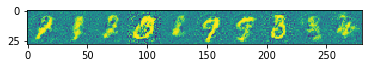

[EPOCH 1 / STEP 96] TRAIN 
TRAIN loss   : 2.5978
GEN   loss   : 2.2510
DIS   loss   : 0.3468
[EPOCH 1 / STEP 96] VAL 
TRAIN loss   : 2.6763
GEN   loss   : 2.3674
DIS   loss   : 0.3089
[EPOCH 5 / STEP 100] TRAIN -- Generator only step
TRAIN loss   : 6.6019
GEN   loss   : 0.0006
DIS   loss   : 6.6013
[EPOCH 5 / STEP 100] VAL -- Generator only step
TRAIN loss   : 7.1385
GEN   loss   : 0.0002
DIS   loss   : 7.1383


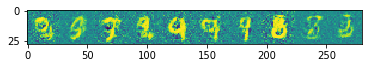

CPU times: user 11min 51s, sys: 1min 4s, total: 12min 55s
Wall time: 12min 50s


In [11]:
%%time
for i in range(10):
    gan.fit(X_train, X_val, both_step=3, gen_step=2, verbose=5, epochs=5)
    randomtest()